In [1]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import regularizers
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
#read train data
data_train = pd.read_csv('KDDTrain+.txt', header=None)

In [4]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  int64  
 1   1       125973 non-null  object 
 2   2       125973 non-null  object 
 3   3       125973 non-null  object 
 4   4       125973 non-null  int64  
 5   5       125973 non-null  int64  
 6   6       125973 non-null  int64  
 7   7       125973 non-null  int64  
 8   8       125973 non-null  int64  
 9   9       125973 non-null  int64  
 10  10      125973 non-null  int64  
 11  11      125973 non-null  int64  
 12  12      125973 non-null  int64  
 13  13      125973 non-null  int64  
 14  14      125973 non-null  int64  
 15  15      125973 non-null  int64  
 16  16      125973 non-null  int64  
 17  17      125973 non-null  int64  
 18  18      125973 non-null  int64  
 19  19      125973 non-null  int64  
 20  20      125973 non-null  int64  
 21  21      12

In [6]:
columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level']

In [7]:
#assign column names to columns
data_train.columns=columns

In [8]:
print(len(data_train.columns))

43


In [9]:
#Since the column num_outbound_cmds has only one value, we will drop this 
data_train['num_outbound_cmds'].nunique()

1

In [10]:
#dropping level column also because it is a classification task, not a regression task
data_train = data_train.drop(['level','num_outbound_cmds'],axis=1)

In [11]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [12]:
print(len(data_train.columns))

41


In [13]:
#classify the outcome variable as normal or attack only
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [14]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in data_train.columns:
    if data_train[c].dtype=='object':    #encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(data_train[c].values))
        data_train[c] = lbl.transform(data_train[c].values)

In [15]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [16]:
data_test = pd.read_csv('KDDTest+.txt', header=None)

In [17]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [18]:
data_test.columns=columns

In [19]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [20]:
#classify the outcome variable as normal or attack only
data_test.loc[data_test['outcome'] == "normal", "outcome"] = 'normal'
data_test.loc[data_test['outcome'] != 'normal', "outcome"] = 'attack'

In [21]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,attack,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,attack,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,attack,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,attack,11


In [22]:
data_test=data_test.drop(['level','num_outbound_cmds'],axis=1)

In [23]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in data_test.columns:
    if data_test[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(data_test[c].values))
        data_test[c] = lbl.transform(data_test[c].values)

In [24]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


In [25]:
X_train=data_train.drop('outcome',axis=1)

In [26]:
y_train=data_train['outcome']

In [27]:
X_test=data_test.drop('outcome',axis=1)

In [28]:
y_test=data_test['outcome']

In [29]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Getting feature importances
importances = clf.feature_importances_

feature_importances = pd.Series(importances, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances:")
print(sorted_importances)

Feature Importances:
src_bytes                      0.204244
dst_bytes                      0.141515
diff_srv_rate                  0.078730
flag                           0.070125
same_srv_rate                  0.061350
dst_host_same_srv_rate         0.048086
dst_host_srv_count             0.046238
protocol_type                  0.044509
dst_host_diff_srv_rate         0.036908
logged_in                      0.032236
count                          0.031763
dst_host_same_src_port_rate    0.024473
service                        0.023910
srv_serror_rate                0.017683
dst_host_serror_rate           0.016110
srv_count                      0.015913
dst_host_srv_diff_host_rate    0.015603
dst_host_srv_serror_rate       0.015542
dst_host_count                 0.015006
dst_host_rerror_rate           0.010401
hot                            0.008492
srv_rerror_rate                0.007844
dst_host_srv_rerror_rate       0.006576
num_compromised                0.006564
serror_rate        

In [30]:
# Set the importance threshold
importance_threshold = 0.005

# Get the names of features above the threshold
important_features = sorted_importances[sorted_importances > importance_threshold].index

# Create a new DataFrame with only these features
X_train_selected = X_train[important_features]


In [31]:
X_train_selected.head()

,src_bytes,dst_bytes,diff_srv_rate,flag,same_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,protocol_type,dst_host_diff_srv_rate,logged_in,...,srv_count,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_count,dst_host_rerror_rate,hot,srv_rerror_rate,dst_host_srv_rerror_rate,num_compromised,serror_rate
0,491,0,0.00,9,1.00,0.17,25,1,0.03,0,...,2,0.00,0.00,150,0.05,0,0.0,0.00,0,0.0
1,146,0,0.15,9,0.08,0.00,1,2,0.60,0,...,1,0.00,0.00,255,0.00,0,0.0,0.00,0,0.0
2,0,0,0.07,5,0.05,0.10,26,1,0.05,0,...,6,0.00,1.00,255,0.00,0,0.0,0.00,0,1.0
3,232,8153,0.00,9,1.00,1.00,255,1,0.00,1,...,5,0.04,0.01,30,0.00,0,0.0,0.01,0,0.2
4,199,420,0.00,9,1.00,1.00,255,1,0.00,1,...,32,0.00,0.00,255,0.00,0,0.0,0.00,0,0.0


In [32]:
X_train_selected.shape

(125973, 25)

In [33]:
X_train = X_train_selected

In [34]:
X_train.head()

,src_bytes,dst_bytes,diff_srv_rate,flag,same_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,protocol_type,dst_host_diff_srv_rate,logged_in,...,srv_count,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_count,dst_host_rerror_rate,hot,srv_rerror_rate,dst_host_srv_rerror_rate,num_compromised,serror_rate
0,491,0,0.00,9,1.00,0.17,25,1,0.03,0,...,2,0.00,0.00,150,0.05,0,0.0,0.00,0,0.0
1,146,0,0.15,9,0.08,0.00,1,2,0.60,0,...,1,0.00,0.00,255,0.00,0,0.0,0.00,0,0.0
2,0,0,0.07,5,0.05,0.10,26,1,0.05,0,...,6,0.00,1.00,255,0.00,0,0.0,0.00,0,1.0
3,232,8153,0.00,9,1.00,1.00,255,1,0.00,1,...,5,0.04,0.01,30,0.00,0,0.0,0.01,0,0.2
4,199,420,0.00,9,1.00,1.00,255,1,0.00,1,...,32,0.00,0.00,255,0.00,0,0.0,0.00,0,0.0


In [35]:
X_train.columns

Index(['src_bytes', 'dst_bytes', 'diff_srv_rate', 'flag', 'same_srv_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'protocol_type',
       'dst_host_diff_srv_rate', 'logged_in', 'count',
       'dst_host_same_src_port_rate', 'service', 'srv_serror_rate',
       'dst_host_serror_rate', 'srv_count', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'dst_host_count', 'dst_host_rerror_rate',
       'hot', 'srv_rerror_rate', 'dst_host_srv_rerror_rate', 'num_compromised',
       'serror_rate'],
      dtype='object')

In [36]:
X_test = X_test[important_features]

In [37]:
X_test.head()

,src_bytes,dst_bytes,diff_srv_rate,flag,same_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,protocol_type,dst_host_diff_srv_rate,logged_in,...,srv_count,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_count,dst_host_rerror_rate,hot,srv_rerror_rate,dst_host_srv_rerror_rate,num_compromised,serror_rate
0,0,0,0.06,1,0.04,0.04,10,1,0.06,0,...,10,0.00,0.0,255,1.00,0,1.0,1.00,0,0.0
1,0,0,0.06,1,0.01,0.00,1,1,0.06,0,...,1,0.00,0.0,255,1.00,0,1.0,1.00,0,0.0
2,12983,0,0.00,9,1.00,0.61,86,1,0.04,0,...,1,0.02,0.0,134,0.00,0,0.0,0.00,0,0.0
3,20,0,0.00,9,1.00,1.00,57,0,0.00,0,...,65,0.28,0.0,3,0.00,0,0.0,0.00,0,0.0
4,0,15,0.00,2,1.00,0.31,86,1,0.17,0,...,8,0.02,0.0,29,0.83,0,0.5,0.71,0,0.0


In [38]:
from sklearn.preprocessing import RobustScaler

In [39]:
#create an instance of RobustScaler
scaler=RobustScaler()

In [40]:
#fit the scaler to X_train
scaler.fit(X_train)

RobustScaler()

In [41]:
# Transform both the training and the test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression(max_iter=10000)

In [44]:
logmodel.fit(X_train, y_train)

c:\Users\mdasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [45]:
predictions_lr = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_lr = accuracy_score(y_test, predictions_lr)

In [48]:
print(f"Accuracy for logistic regression: {accuracy_lr:.2f}")

Accuracy for logistic regression: 0.75


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(confusion_matrix(y_test, predictions_lr))

[[7919 4914]
 [ 641 9070]]


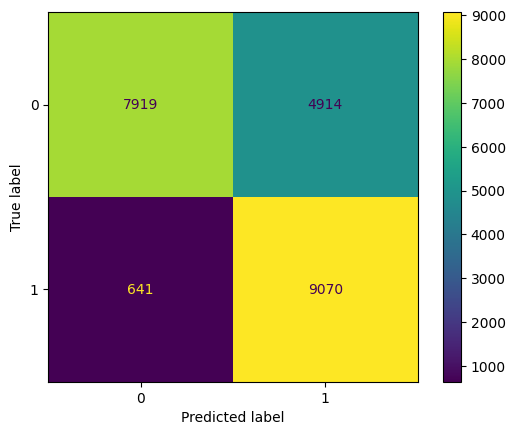

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions_lr)
# plt.savefig('CM for logistic regression.png',dpi=300)